# 1. Parsing du document xml et extraction des informations en vue de la constitution d'un dataframe

In [3]:
def ParsingXMLTEItoDictList(CheminRelatifFichier,DivCC):
    
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(open(CheminRelatifFichier, 'r'))

    ListeDicosPersonnes = []

    for persname in soup.find_all('persname'):

        DicoPersonne = {}

        for surname in persname.find_all('surname'):
            DicoPersonne['nom'] = surname.get_text()

        for forename in persname.find_all('forename'):
            DicoPersonne['prénom'] = forename.get_text()

        for genname in persname.find_all('genname'):
            DicoPersonne['surnom'] = genname.get_text()

        Roles = []
        for rolename in persname.find_all('rolename'):
            Roles.append(rolename.get_text())
            DicoPersonne['fonction'] = Roles

        for div1 in persname.find_parents('div1'):
            DicoPersonne['corps civique'] = div1['type']

        for div2 in persname.find_parents('div2'):
            DicoPersonne['Corporation'] = div2['type']

        for div3 in persname.find_parents('div3'):
            DicoPersonne['Poêle'] = div3['type']       

        ListeDicosPersonnes.append(DicoPersonne)

    return (ListeDicosPersonnes)

In [4]:
ListeDicosPersonnes = ParsingXMLTEItoDictList('../Sources/EditionsXML/aves_aa_195_f69r-77r-v2.xml', 'div1')
print(ListeDicosPersonnes)

[{'nom': 'Schalck', 'prénom': 'Obreht', 'fonction': ['her', 'ammeister'], 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Armbruster In Brantgasse', 'prénom': 'Cünrat', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Amlung', 'prénom': 'Hanns', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Phige', 'prénom': 'Reimbolt', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Lumbart', 'prénom': 'Hanns', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Lumbart', 'prénom': 'Steffan', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Armbruster', 'prénom': 'Hanns', 'fonction': ['rotherre'], 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_E

# 2. Normalisation des prénoms

ForenamesDict = {'Johann' : ['Johann', 'Johannes', 'Johanns','Hanns', 'Johan', 'Johanes', 'Johans', 'Hanns', 'Hannes', 'Hans', 'Hanes']}
for Dictionnary in ParsingXMLTEItoDictList('../Sources/EditionsXML/aves_aa_195_f69r-77r-v2.xml'):
    for key1 in Dictionnary.items():
        if key1 == 'prénom':
            print (Dictionnary[key1])
            for value2 in ForenamesDict.values():
                for element in value2:
                    if value1 == element :
                        value1 = key2
                    else:
                        Newkey = input('Entrez la forme normalisée du prénom "' + value1 + '" :')
                        Newvalue = []
                        #ForenamesDict[key2].append(print(input('Entrez la forme normalisée de ce prénom :')))
                        #ForenamesDict[Newkey] = Newvalue.append(value1)
                                
print(ForenamesDict)

In [6]:
import pandas as pd
dataframe = pd.DataFrame(ListeDicosPersonnes)
#print (dataframe)

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dataframe)

                          nom      prénom                       fonction  \
0                     Schalck      Obreht               [her, ammeister]   
1    Armbruster In Brantgasse      Cünrat                            NaN   
2                      Amlung       Hanns                            NaN   
3                       Phige    Reimbolt                            NaN   
4                     Lumbart       Hanns                            NaN   
5                     Lumbart     Steffan                            NaN   
6                  Armbruster       Hanns                     [rotherre]   
7                    Bisinger    Heinrich                            NaN   
8                  Wissenburg       Hanns                            NaN   
9               von Lutesheim       Hanns                            NaN   
10                       Hage       Jacop                            NaN   
11                    Merckel     Cüntzel                            NaN   
12          

In [8]:
dataframe[["nom","prénom"]].describe()

,nom,prénom
count,348,374
unique,292,90
top,von Molsheim,Hanns
freq,5,104


In [9]:
NomPrénom = dataframe[['nom', 'prénom']].to_csv(index=True)
print (NomPrénom)
with open ('../Tables/NomsPrénoms.csv','w') as Doc:
    Doc.write(NomPrénom)

,nom,prénom
0,Schalck,Obreht
1,Armbruster In Brantgasse,Cünrat
2,Amlung,Hanns
3,Phige,Reimbolt
4,Lumbart,Hanns
5,Lumbart,Steffan
6,Armbruster,Hanns
7,Bisinger,Heinrich
8,Wissenburg,Hanns
9,von Lutesheim,Hanns
10,Hage,Jacop
11,Merckel,Cüntzel
12,Berner,Frantz
13,Jude,Heintz
14,Amlung,Jacob
15,,
16,Rebe,Laulin
17,Schaffener,Hanns
18,Schultheiss,Panteleon
19,Erbe,Lawelin
20,Reb,Hensel
21,,Cüne
22,Cüne,Hensel
23,Lise,Heinrich
24,Wiss,Peter
25,Diether,Diebolt
26,Jeger,Hanseman
27,Hirse,Heintz
28,Riffe,Adam
29,Voltz,Peter
30,Barpfennig,Marx
31,Barpfennig,Rüdolff
32,Brucker,Peter
33,Riffe,Peter
34,Hapmacher,Andres
35,Böschwiller,Claus
36,Slempe,Heinrich
37,Scholle,Bernhart
38,von Seckingen,Fridel
39,Wormsser,Jacop
40,Stange,Erhart
41,Stange,Gilge
42,Würant,Claus
43,Menser,Hanns
44,von Cölne,Peter
45,von Northus,Hanns
46,Arge,Peter
47,Ofentürer,Peter
48,Dundenheim,Hanns
49,Dundenheim,Peter
50,Sahsse,Steffan
51,von Marle,Diebolt
52,Vilinger,Erhart
53,Meistersheim,Hanns
54,Rotschilt,Wilhelm
55,v

In [11]:
import matplotlib.pyplot as plt
df2 = dataframe["Corporation"].value_counts()
df3 = dataframe['Poêle'].value_counts()

<AxesSubplot:ylabel='Corporation'>

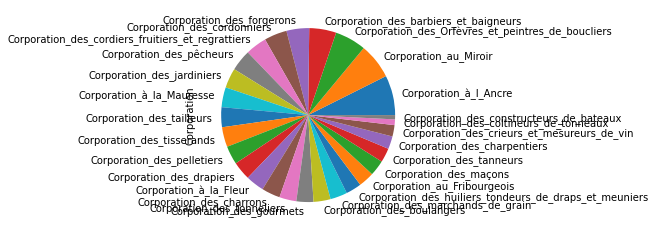

In [12]:
df2.plot.pie()

In [9]:
plt.show()